Importing the Dependencies

In [584]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [585]:
import warnings
warnings.filterwarnings("ignore")

Data Collection and Processing

In [586]:
heart_data = pd.read_csv('/content/heart_disease_data.csv')
heart_data.head()

,Age,Sex,Chest Pain Type,Resting BP,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate,Exercise Induced Angina,oldpeak,slope,Number of Major Vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [587]:
heart_data.shape

(303, 14)

In [588]:
heart_data.isnull().values.any()

False

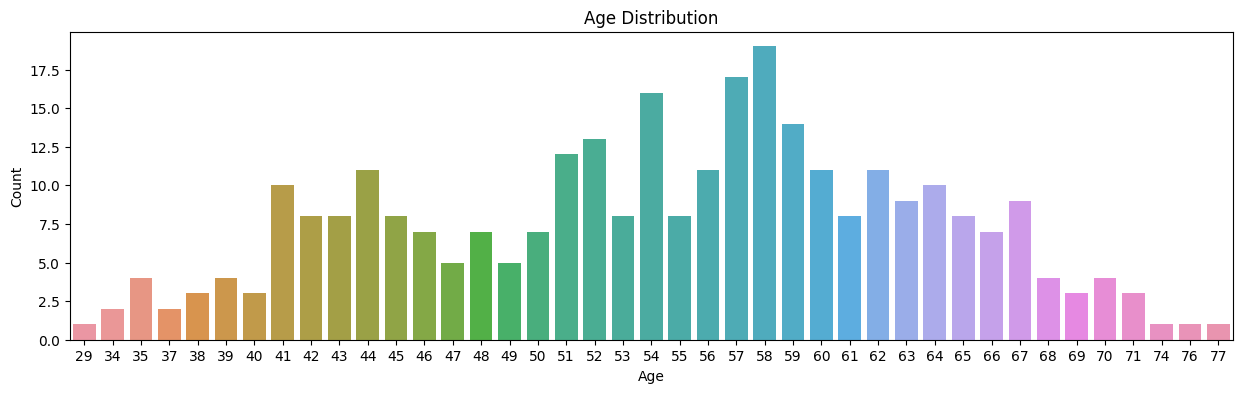

In [589]:
plt.figure(figsize=(15,4))
sns.countplot(x=heart_data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

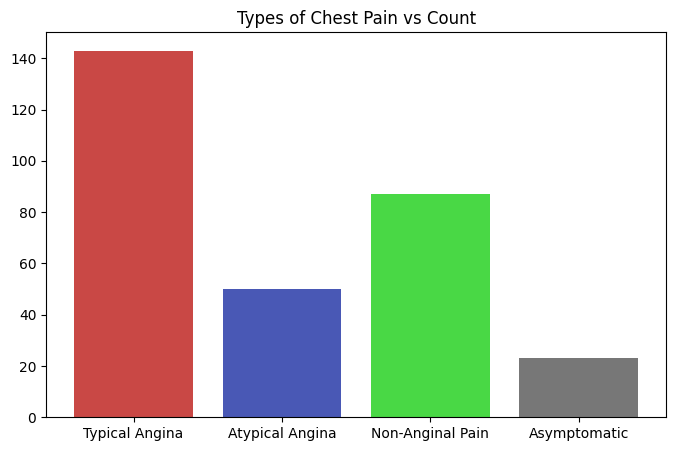

In [590]:
painValues = heart_data['Chest Pain Type'].value_counts()
pain_dict={"Typical Angina": painValues[0], "Atypical Angina": painValues[1],"Non-Anginal Pain": painValues[2],"Asymptomatic": painValues[3]}
names=list(pain_dict.keys())
values=list(pain_dict.values())

plt.figure(figsize=(8,5))
plt.title('Types of Chest Pain vs Count')
plt.bar(range(len(pain_dict)), values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.show()

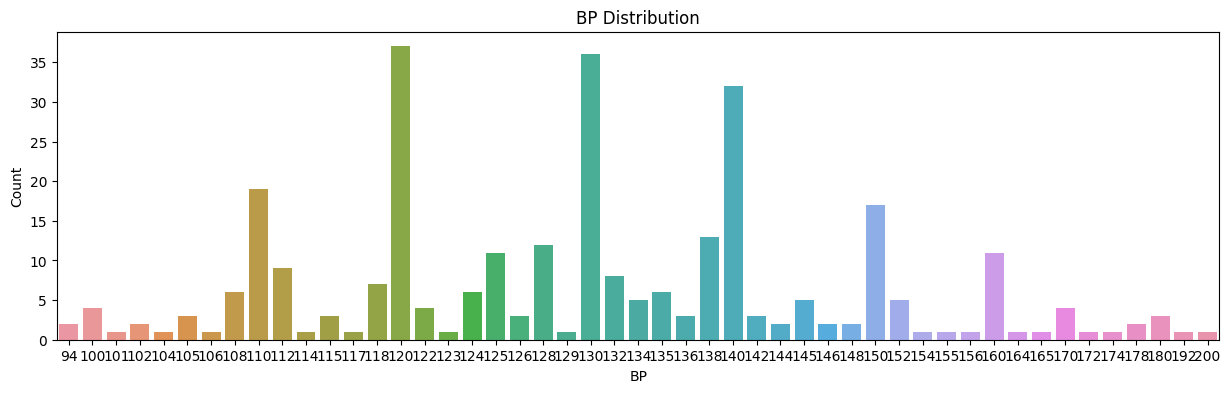

In [591]:
plt.figure(figsize=(15,4))
sns.countplot(x=heart_data['Resting BP'])
plt.xlabel('BP')
plt.ylabel('Count')
plt.title('BP Distribution')
plt.show()

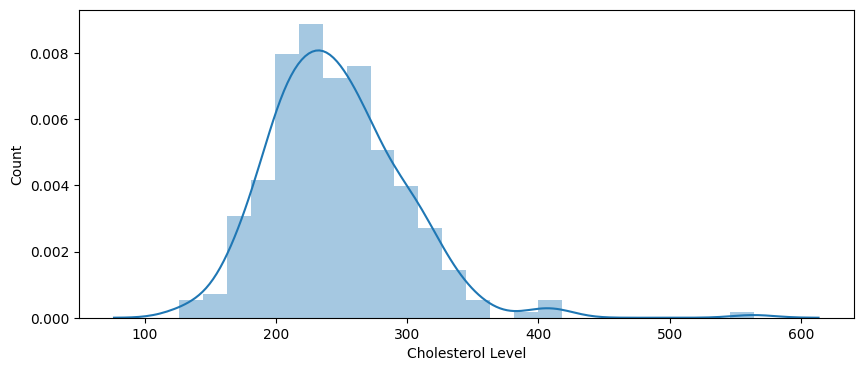

In [592]:
plt.figure(figsize=(10,4))
sns.distplot(heart_data['Serum Cholestrol'])
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

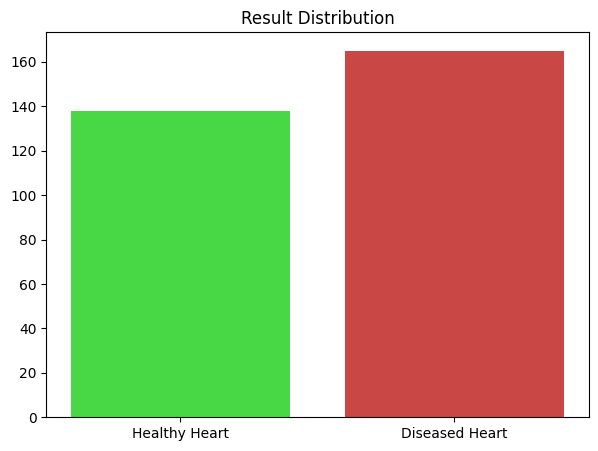

In [593]:
result = heart_data['target'].value_counts()
result_dict={"Healthy Heart": result[0], "Diseased Heart": result[1]}
names=list(result_dict.keys())
values=list(result_dict.values())

plt.figure(figsize=(7,5))
plt.title('Result Distribution')
plt.bar(range(len(result_dict)), values, tick_label=names, color=['#49D845', '#C94845'])
plt.show()

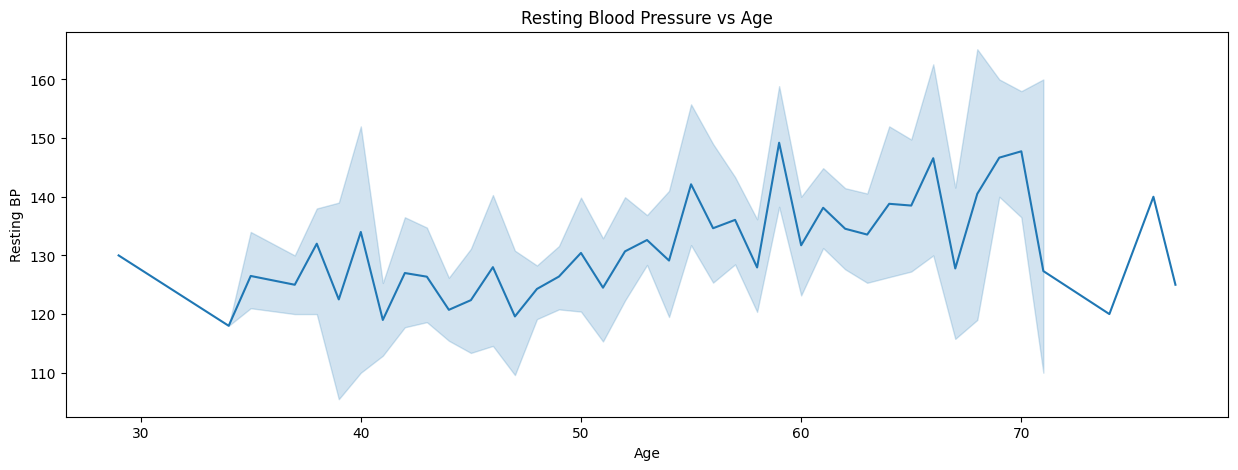

In [594]:
# Age vs Blood Pressure at rest
plt.figure(figsize=(15,5))
sns.lineplot(x="Age", y="Resting BP", data=heart_data)
plt.title("Resting Blood Pressure vs Age")
plt.show()

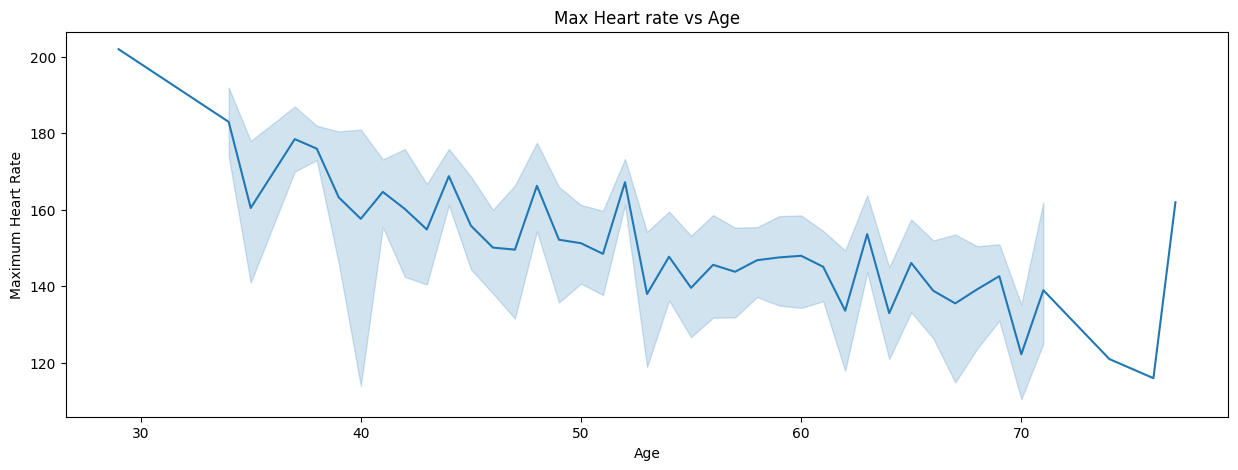

In [595]:
# Age vs Max heart rate
plt.figure(figsize=(15,5))
sns.lineplot(x="Age", y="Maximum Heart Rate", data=heart_data)
plt.title("Max Heart rate vs Age")
plt.show()

Splitting the Features and Target

In [596]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

Training-Test Split

In [597]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=3)

In [598]:
print(X.shape, X_train.shape, X_test.shape)
accuracy={}

(303, 13) (242, 13) (61, 13)


Model Training

**Logistic Regression**

In [599]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [600]:
from sklearn.linear_model import LogisticRegression
from numpy.random.mtrand import logistic

logic = LogisticRegression()
logic.fit(X_train, Y_train)

# Training Data Accuracy
X_train_prediction = logic.predict(X_train)
logic_accuracy = accuracy_score(X_train_prediction, Y_train)*100

# Test Data Accuracy
X_test_prediction = logic.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)*100

accuracy["Logistic"]=logic_accuracy
print('True Values:            ', Y_test.values[0:10])
print('Predicted Values:       ', X_test_prediction[0:10])
print('Training Data Accuracy : %.2f'%logic_accuracy,"%")
print('Test Data Accuracy :     %.2f'%test_data_accuracy,"%")
print("Precision:               %.2f"%(precision_score(Y_test,X_test_prediction)*100))

True Values:             [0 1 1 0 0 1 0 0 1 1]
Predicted Values:        [0 0 1 0 0 1 1 1 1 1]
Training Data Accuracy : 86.36 %
Test Data Accuracy :     78.69 %
Precision:               77.78


**K-Nearest Neighbours**

In [601]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

y_pred = knn.predict(X_test)

print("Using KNN Model")
print('True Values:     ', Y_test.values[0:10])
print('Predicted Values:', y_pred[0:10])

knn_acc=accuracy_score(Y_test,y_pred)*100
print("Accuracy:         %.2f"%knn_acc,"%")
print("Precision:        %.2f"%(precision_score(Y_test,y_pred)*100))

accuracy["KNN"]=knn_acc

Using KNN Model
True Values:      [0 1 1 0 0 1 0 0 1 1]
Predicted Values: [0 1 1 0 0 1 1 0 1 1]
Accuracy:         80.33 %
Precision:        81.82


**Random Forest Model**

In [602]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3,n_estimators=40)
rf.fit(X_train,Y_train)

rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(Y_test, rf_predicted)*100

print("Using Random Forest")
print('True Values:     ', Y_test.values[0:10])
print('Predicted Values:', rf_predicted[0:10])
print("Accuracy:         %.2f"%rf_acc_score,"%")
print("Precision:        %.2f"%(precision_score(Y_test,rf_predicted)*100))

accuracy["RandomForest"]=rf_acc_score

Using Random Forest
True Values:      [0 1 1 0 0 1 0 0 1 1]
Predicted Values: [0 1 1 0 0 1 1 1 1 1]
Accuracy:         78.69 %
Precision:        76.32


**Support Vector Machines (SVM) Model**

In [603]:
from sklearn.svm import SVC

support_vector=SVC(kernel='linear')
support_vector.fit(X_train,Y_train)
y_pred = support_vector.predict(X_test)

print("Using SVM Model")
print('True Values:     ', Y_test.values[0:10])
print('Predicted Values:', y_pred[0:10])
acc=accuracy_score(Y_test,y_pred)*100
print("Accuracy:         %.2f"%acc,"%")
print("Precision:        %.2f"%(precision_score(Y_test,y_pred)*100))

accuracy["SVM"]=acc

Using SVM Model
True Values:      [0 1 1 0 0 1 0 0 1 1]
Predicted Values: [0 0 1 0 0 1 1 1 1 1]
Accuracy:         77.05 %
Precision:        75.68


**Performance Conparison**

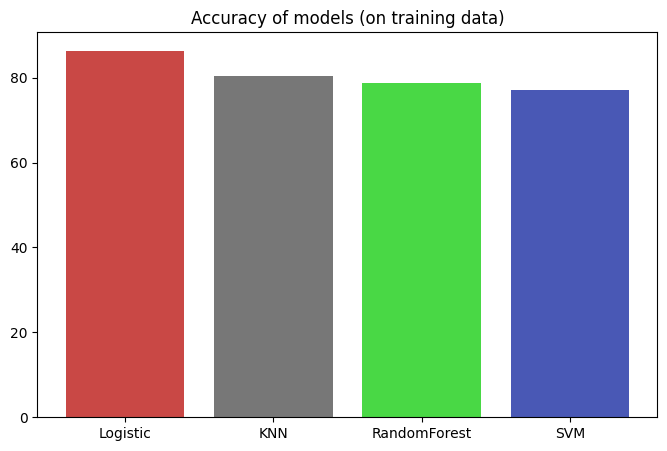

In [604]:
names=list(accuracy.keys())
values=list(accuracy.values())

plt.figure(figsize=(6,5))
plt.bar(range(len(accuracy)), values, tick_label=names, color=['#C94845', '#777777', '#49D845', '#4958B5'])
plt.title('Accuracy of models (on training data)')
plt.show()

In [605]:
input_data=input("Enter the reading values : ")
inTuple=tuple(map(float, input_data.split(',')))
numpy_array = np.asarray(inTuple)

reshaped = numpy_array.reshape(1,-1)
prediction = logic.predict(reshaped)

print("==========================================================")
if(prediction[0]==0):
  print("The Patient has a HEALTHY HEART.")
else:
  print("The Patient's heart is PRONE TO A DISEASE!!!")
print("==========================================================")

Enter the reading values : 63,1,3,145,233,1,0,150,0,2.3,0,0,1
The Patient has a HEALTHY HEART.
